# Exercise 6.4 Supervised Machine Learning: Regressions

## Table of Contents:

1. Importing Data and Libraries

3. Data Prep for Regression Analysis

4. Regression Analysis

5. Conclusions

## Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#importing data using path shortcut

path1 = r'/Users/elysegross/Documents/Data Analytics/A6/'
df_emissions = pd.read_csv(os.path.join(path1, 'Data', '2019 Emissions Clean and Wrangled.csv'))


## Data Prep for Regression Analysis

#### Scatterplot

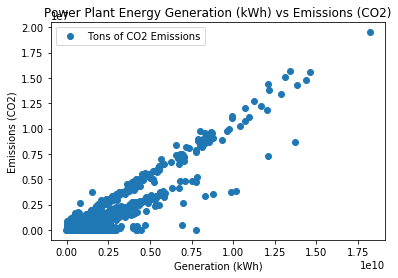

In [6]:
# First, I have created a scatterplot
# The style option creates a scatterplot without it, we only have lines.

df_emissions.plot(x = 'Generation (kWh)', y = 'Tons of CO2 Emissions', style='o')
plt.title('Power Plant Energy Generation (kWh) vs Emissions (CO2)')  
plt.xlabel('Generation (kWh)')  
plt.ylabel('Emissions (CO2)')  
plt.show()


#### Hypothesis:

If a power plant generates more energy (kWh) then it will emit more CO2.

#### Reshaping variables for regression analysis

In [9]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_emissions['Generation (kWh)'].values.reshape(-1,1)
y = df_emissions['Tons of CO2 Emissions'].values.reshape(-1,1)

In [10]:
X

array([[2.82488700e+09],
       [5.30639100e+09],
       [4.17490419e+09],
       ...,
       [1.76811600e+07],
       [1.67920000e+07],
       [1.24210000e+07]])

In [11]:
y

array([[  87728.21],
       [3252938.83],
       [4270348.31],
       ...,
       [  34369.45],
       [  72107.71],
       [  57775.19]])

#### Split Data into Sets

In [12]:
# Split the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


## Regression Analysis

#### Create an object

In [13]:
# Create a regression object

regression = LinearRegression()

#### Train the model

In [14]:
# Fit the regression object to the training data set

regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predict using the model

In [15]:
# Predict the values of y using x

y_predicted = regression.predict(X_test)

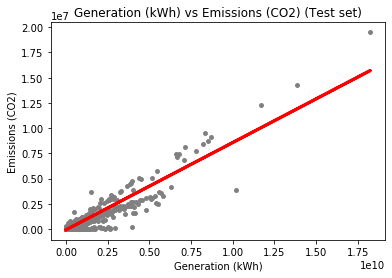

In [16]:
# Making a plot to show the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Generation (kWh) vs Emissions (CO2) (Test set)')
plot_test.xlabel('Generation (kWh)')
plot_test.ylabel('Emissions (CO2)')
plot_test.show()

#### Check the accuracy of model

In [21]:
# Create objects for rmse and R2 to check accuracy

# mean squared error
rmse = mean_squared_error(y_test, y_predicted) 

# R2 score
r2 = r2_score(y_test, y_predicted) 

In [22]:
# Checking the accuracy

print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[0.0008647]]
Mean squared error: 178210563595.70572
R2 score: 0.8670027113245121


In [23]:
# Compare the actual and predicted y values by making a new dataframe

data_compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

data_compare.head(30)

,Actual,Predicted
0,146.31,-6.838019e+04
1,0.56,-6.860082e+04
2,3800.84,-6.363284e+04
3,2740.80,-6.470570e+04
4,2878153.15,2.152442e+06
5,34.03,-6.856938e+04
6,619.76,-6.819942e+04
7,437.42,-6.858697e+04
8,524.92,-6.843933e+04
9,3116.57,-5.782546e+04


## Conclusions

The above checks show me that the hypothesis is not entirely correct; there is more to the story. Though the R2 value is high, the comparative data set shows us the predicted values are very far off from the actual values. There is a lot of variance which the linear regression model is missing. This means there is more going on then a simple positive, linear relationship between Energy Generation in kWh and CO2 Emissions. A model with more dimensionality would allow me to further understand this relationship.

# THE END!